___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [6]:
start = dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)
df = pd.read_pickle('all_banks')
type(df["BAC"])
df.columns

MultiIndex(levels=[['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['Open', 'High', 'Low', 'Close', 'Volume']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Bank Ticker', 'Stock Info'])

In [7]:
BAC = df["BAC"].copy()
C=df["C"].copy()
GS=df["GS"].copy()
JPM=df["JPM"].copy()
MS=df["MS"].copy()
WFC=df["WFC"].copy()

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [8]:
tickers = ["BAC", "C", "GS", "JPM","MS", "WFC"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [9]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                     C                       \
Stock Info   Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                           
2006-01-03  46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04  47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05  46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06  46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09  46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

                       ...        MS                                  WFC  \
Stock Info   Volume    ...      Open   High    Low  Close   Volume   Open   
Date                   ...                                                  
2006-01-03  1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04  1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05  1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06  1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09  1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

                                           
Stock Info   High    Low  Close    Volume  
Date                                       
2006-01-03  31.98  31.20  31.90  11016400  
2006-01-04  31.82  31.36  31.53  10871000  
2006-01-05  31.56  31.31  31.50  10158000  
2006-01-06  31.78  31.38  31.68   8403800  
2006-01-09  31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [11]:
bank_stocks.head(5)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.columns

MultiIndex(levels=[['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['Open', 'High', 'Low', 'Close', 'Volume']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Bank Ticker', 'Stock Info'])

In [13]:
bank_stocks.xs("Close", axis=1, level=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()
type(returns)

pandas.core.frame.DataFrame

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [15]:
returns = bank_stocks.xs("Close", axis=1, level=1).pct_change()
returns.columns = ['BAC Return', 'C Return', 'GS Return', 'JPM Return','MS Return','WFC Return']
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\98ani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\98ani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


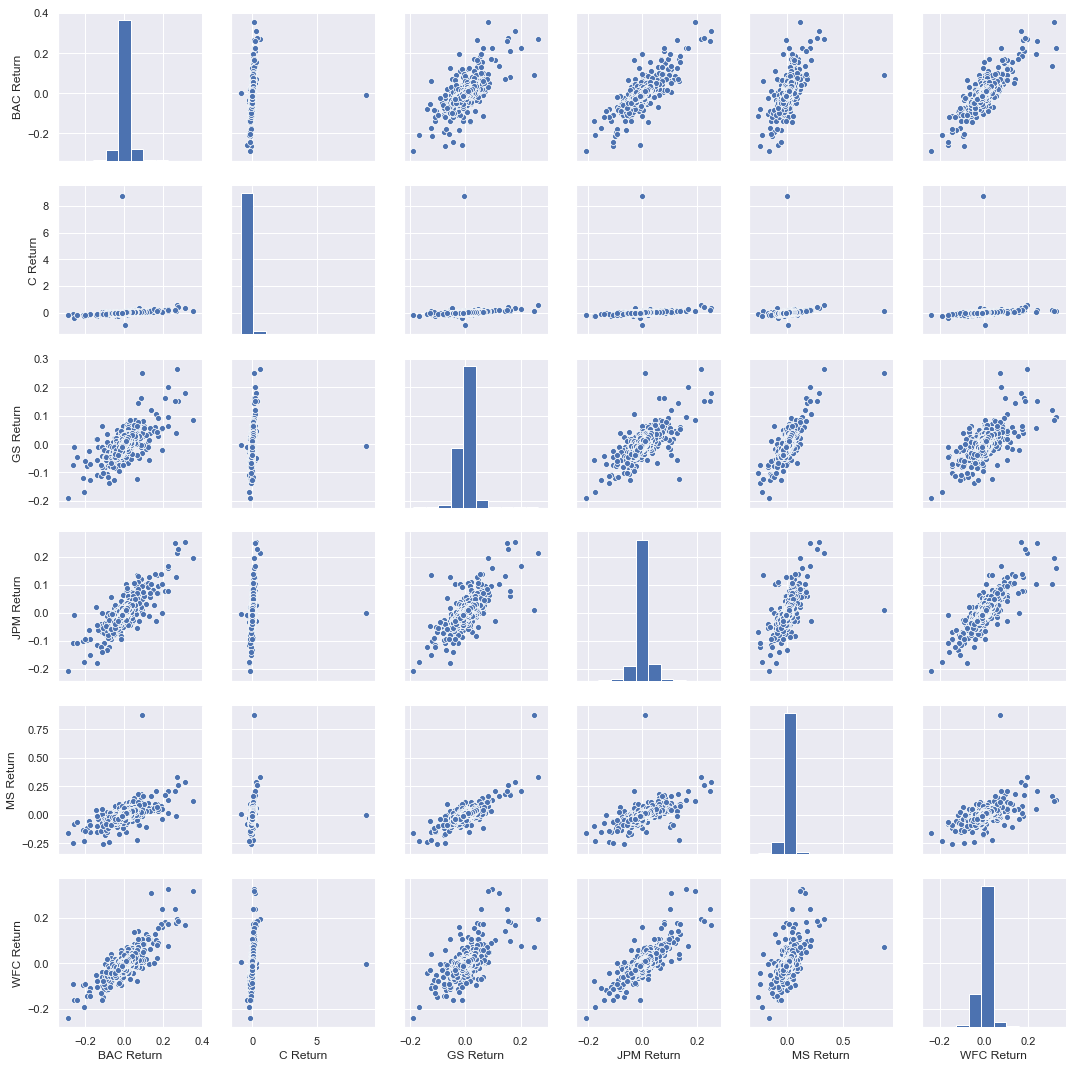

In [17]:
sns.set()
sns.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [18]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [19]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [20]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [21]:
returns[returns.index.year==2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [22]:
returns["MS Return"]

Date
2006-01-03         NaN
2006-01-04    0.000686
2006-01-05    0.002742
2006-01-06    0.001025
2006-01-09    0.010586
2006-01-10    0.000507
2006-01-11    0.005910
2006-01-12   -0.001679
2006-01-13   -0.001513
2006-01-17   -0.009599
2006-01-18   -0.003911
2006-01-19    0.013144
2006-01-20   -0.025274
2006-01-23    0.010890
2006-01-24    0.003591
2006-01-25    0.008179
2006-01-26    0.013520
2006-01-27    0.013507
2006-01-30   -0.001810
2006-01-31    0.012856
2006-02-01    0.006184
2006-02-02   -0.009057
2006-02-03    0.002775
2006-02-06    0.004720
2006-02-07   -0.019439
2006-02-08    0.012225
2006-02-09   -0.001469
2006-02-10   -0.014220
2006-02-13   -0.008290
2006-02-14    0.004347
                ...   
2015-11-18    0.019649
2015-11-19   -0.002336
2015-11-20   -0.007609
2015-11-23   -0.007962
2015-11-24   -0.001486
2015-11-25    0.000595
2015-11-27    0.005058
2015-11-30    0.015394
2015-12-01    0.028280
2015-12-02   -0.010774
2015-12-03   -0.012611
2015-12-04    0.025254
2015-1

In [23]:
(returns["MS Return"][1:])

Date
2006-01-04    0.000686
2006-01-05    0.002742
2006-01-06    0.001025
2006-01-09    0.010586
2006-01-10    0.000507
2006-01-11    0.005910
2006-01-12   -0.001679
2006-01-13   -0.001513
2006-01-17   -0.009599
2006-01-18   -0.003911
2006-01-19    0.013144
2006-01-20   -0.025274
2006-01-23    0.010890
2006-01-24    0.003591
2006-01-25    0.008179
2006-01-26    0.013520
2006-01-27    0.013507
2006-01-30   -0.001810
2006-01-31    0.012856
2006-02-01    0.006184
2006-02-02   -0.009057
2006-02-03    0.002775
2006-02-06    0.004720
2006-02-07   -0.019439
2006-02-08    0.012225
2006-02-09   -0.001469
2006-02-10   -0.014220
2006-02-13   -0.008290
2006-02-14    0.004347
2006-02-15    0.013151
                ...   
2015-11-18    0.019649
2015-11-19   -0.002336
2015-11-20   -0.007609
2015-11-23   -0.007962
2015-11-24   -0.001486
2015-11-25    0.000595
2015-11-27    0.005058
2015-11-30    0.015394
2015-12-01    0.028280
2015-12-02   -0.010774
2015-12-03   -0.012611
2015-12-04    0.025254
2015-1

C:\Users\98ani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


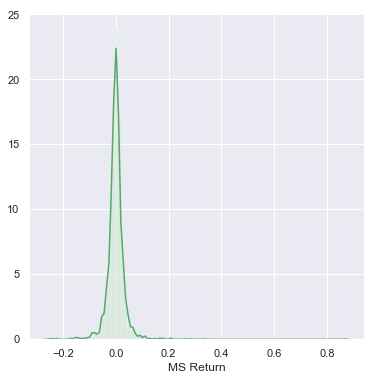

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(returns["MS Return"][1:], bins=350, color="g")


/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



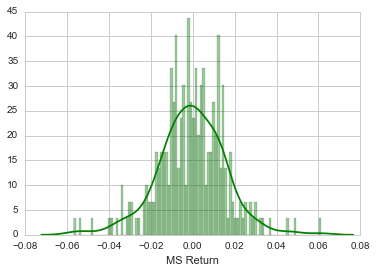

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\98ani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


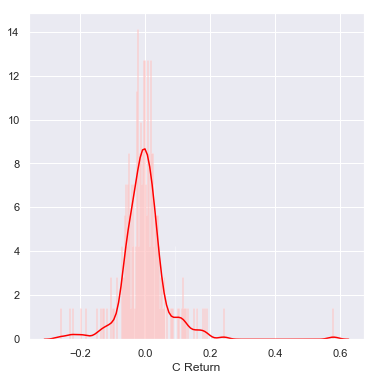

In [25]:
plt.figure(figsize=(6,6))
citi2008= returns[returns.index.year==2008]["C Return"]
sns.distplot(citi2008[1:], bins=300, color="red")

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<Figure size 864x432 with 0 Axes>

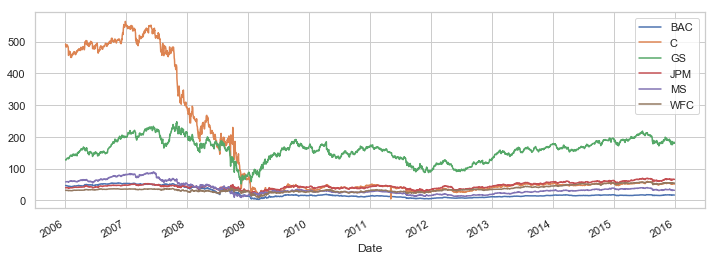

In [27]:
plt.figure(figsize=(12,6))
bank_stocks.xs("Close", axis=1, level=1).plot(figsize=(12,4))
plt.legend()

In [28]:
bank_stocks.xs("Close", axis=1, level=1).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

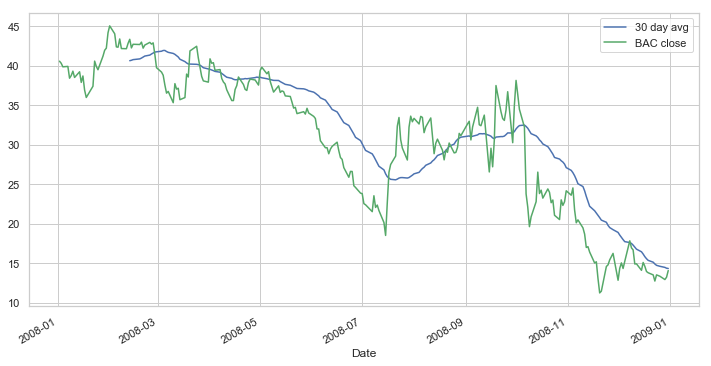

In [29]:
plt.Figure(figsize=(12,6))
(bank_stocks["BAC"]["Close"][bank_stocks.index.year==2008]).rolling(window=30).mean().plot(figsize=(12,6), label = "30 day avg")
(bank_stocks["BAC"]["Close"][bank_stocks.index.year==2008]).plot(color="g",figsize=(12,6),label = "BAC close")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [30]:
corelation = bank_stocks.xs("Close", axis=1, level=1).corr()

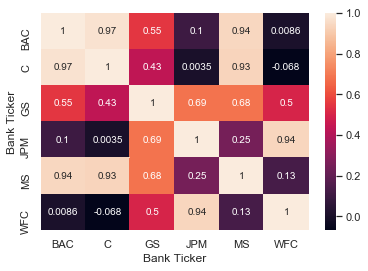

In [31]:
sns.heatmap(corelation, annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

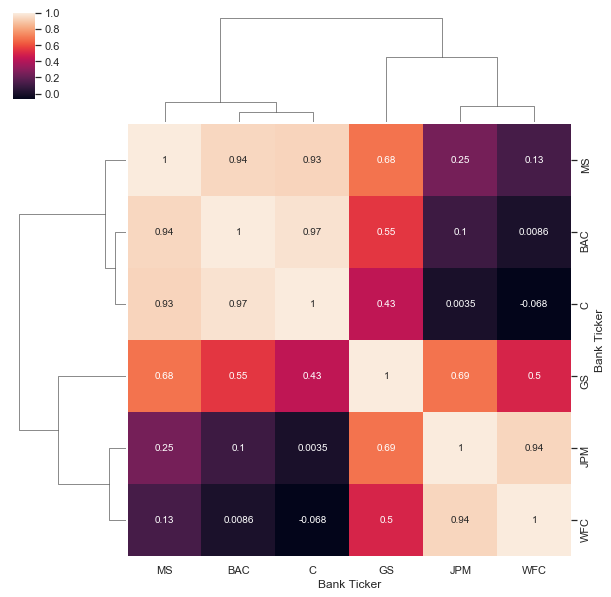

In [32]:
sns.clustermap(corelation, annot=True)

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.